In [31]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
df = pd.read_csv("dataset/bitcoin.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Vol.
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K


In [4]:
df.describe()

,Open,High,Low,Close
count,3793.000000,3793.000000,3793.000000,3793.000000
mean,11233.252307,11529.297996,10904.581545,11240.315766
std,15421.568722,15827.119004,14960.319732,15422.533996
min,13.300000,13.400000,13.200000,13.300000
25%,450.300000,459.600000,441.900000,451.400000
50%,5208.300000,5322.900000,5033.700000,5209.100000
75%,14976.200000,15648.300000,13902.300000,15043.000000
max,67528.700000,68990.600000,66334.900000,67527.900000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3793 non-null   object 
 1   Open    3793 non-null   float64
 2   High    3793 non-null   float64
 3   Low     3793 non-null   float64
 4   Close   3793 non-null   float64
 5   Vol.    3793 non-null   object 
dtypes: float64(4), object(2)
memory usage: 177.9+ KB


In [6]:
df.shape

(3793, 6)

In [7]:
#creating a new feature 
closed = df[['Date','Close']]
closed.shape

(3793, 2)

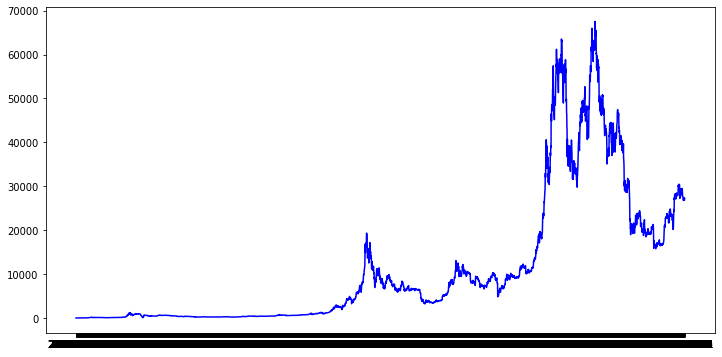

In [9]:
plt.figure(1,figsize=(12,6))
plt.plot(closed['Date'], closed['Close'], color='blue', label='Close Price')
plt.show()

In [10]:
price = closed[closed['Date'] >= '2021-01-01'] #in bracket there is a condition 
#that says just put the data from 2021-01-01 to the end of the data set
price

,Date,Close
2922,2021-01-01,29359.9
2923,2021-01-02,32193.3
2924,2021-01-03,32958.9
2925,2021-01-04,32022.6
2926,2021-01-05,33991.5
...,...,...
3788,2023-05-17,27403.1
3789,2023-05-18,26828.0
3790,2023-05-19,26882.9
3791,2023-05-20,27116.2


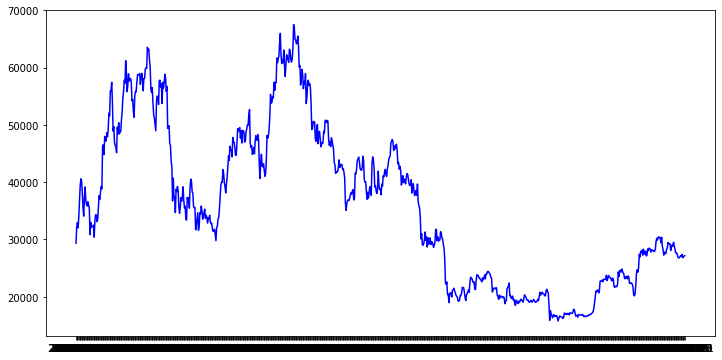

In [12]:
plt.figure(1,figsize=(12,6))
plt.plot(price['Date'], price['Close'], color='blue', label='Close Price')
plt.show()

In [ ]:
x =price['Close'][0:3]
print(x)

2922    29359.9
2923    32193.3
2924    32958.9
Name: Close, dtype: float64


In [19]:
x = price['Close']
x.shape

(871,)

In [20]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0,1)) #minmax scaler is used to scale the data between 0 and 1
x  = scaler.fit_transform(np.array(x).reshape(-1,1)) #this is used to fit the data and transform it into a numpy array

In [22]:
x_train = x[0:650]
x_test = x[650:750] #this is used to split the data into training and testing data
x_val = x[750:] 

In [28]:
#train dataset
x1=[]
y1=[]
a=[]
b=[]
for i in range(len(x_train)-5-1):
    a = x_train[i:i+5,0] #this is used to create a list of 5 elements from the training data
    b = x_train[i+5] #this is used to create a list of 1 element from the training data
    x1.append(a)
    y1.append(b)

x_train1 = np.array(x1)
y_train1 = np.array(y1)
    
print(x_train1.shape)
x_train1.shape, y_train1.shape

 #dataset for test
x2=[]
y2=[]
c=[]
d=[]
for i in range(len(x_test)-5-1):
    c = x_test[i:i+5,0] #this is used to create a list of 5 elements from the training data
    d = x_test[i+5] #this is used to create a list of 1 element from the training data
    x2.append(c)
    y2.append(d)

x_test1 = np.array(x2)
y_test1 = np.array(y2)
    
print(x_test1.shape)

#val datasset
x3=[]
y3=[]
e=[]
f=[]
for i in range(len(x_val)-5-1):
    e = x_val[i:i+5,0] #this is used to create a list of 5 elements from the training data
    f = x_val[i+5] #this is used to create a list of 1 element from the training data
    x3.append(e)
    y3.append(f)

x_val1 = np.array(x3)
y_val1 = np.array(y3)

print(x_val1.shape)



(644, 5)
(94, 5)
(115, 5)


In [29]:
#lstm format [tedad, length, features]
#so we need reshaping becayse we need 3 dimension
x_train1 = x_train1.reshape(644,5,1)
x_test1 = x_test1.reshape(94,5,1)
x_val1 = x_val1.reshape(115,5,1)


print(x_train1.shape)
print(x_test1.shape)
print(x_val1.shape)

(644, 5, 1)
(94, 5, 1)
(115, 5, 1)


In [ ]:
#making the model
model = Sequential()

model.add(LSTM(units=10, activation='relu', input_shape = (None,1)))
model.add(Dense(1))

#compiling the model
model.compile(loss="mean_squared_error", optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491 (1.92 KB)
Trainable params: 491 (1.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
#teaching model
history = model.fit(x_train1, y_train1,
                    validation_data=(x_val1, y_val1),
                    epochs=50,
                    validation_split=0.2)

Epoch 1/50
21/21 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 3.5620e-04
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 3.5852e-04
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 3.8469e-04
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 3.5207e-04
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 3.7320e-04
Epoch 6/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 3.8630e-04
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 3.3194e-04
Epoch 8/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 3.7747e-04
Epoch 9/50
21/21 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 3.8259e-04
Epoch 10/50
21/21 [==============================] - 0s 3ms/step - loss: 0.0017 - 